In [43]:
!pip install jcopml # intall library jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.4 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.4-py2.py3-none-any.whl size=42429 sha256=e1b8ef1d8a1e2519a374854b7dd20b8ae3c3de300676e28a28b28a61c22197ef
  Stored in directory: /root/.cache/pip/wheels/60/8e/5c/369ea57808ee92f880e0ed18b86004a0d469e9fcdee1b867d7
Successfully built jcopml


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from jcopml.plot import plot_confusion_matrix

In [5]:
df = pd.read_csv('Heart_disease_cleveland_new.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [7]:
df.shape

(303, 14)

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# melihat jumlah berapa banyak pasien yang terkena penyakit jantung
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

In [23]:
df.var()

age           81.697419
sex            0.218368
cp             0.921841
trestbps     309.751120
chol        2680.849190
fbs            0.126877
restecg        0.989968
thalach      523.265775
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             0.873058
thal           0.915284
target         0.249120
dtype: float64

<Axes: xlabel='age', ylabel='count'>

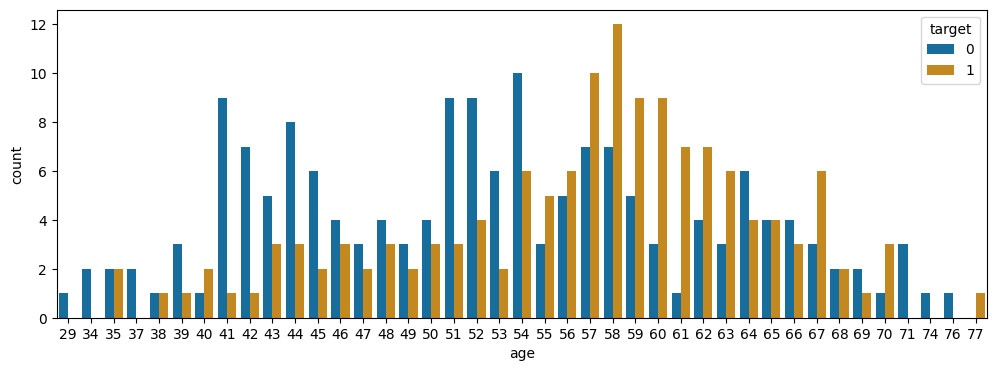

In [12]:
# show the number of patient that has heart_disease and not by age

plt.subplots(figsize = (12,4))
sns.countplot(x = 'age',
              hue = 'target',
              data = df,
              palette = 'colorblind')

In [14]:
# split the data into target and attribute
X = df.drop('target', axis=1)
y = df["target"]

In [16]:
# split the data into 75% trainning and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)

In [24]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [25]:
param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}

In [29]:
grid_search = GridSearchCV(GNB, param_grid, cv=5, scoring='accuracy')

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             scoring='accuracy')

In [31]:
print("Best var_smoothing:", grid_search.best_params_['var_smoothing'])

Best var_smoothing: 1e-05


In [34]:
GNB = GaussianNB(var_smoothing = 1e-05)
GNB.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-05)

In [35]:
GNB.score(X_train, y_train)

0.8634361233480177

In [40]:
cm = confusion_matrix(y_test, GNB.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Testing Accuracy = {}'.format( ( TP + TN ) / ( TP + TN + FN + FP )))

[[36  4]
 [ 9 27]]
Model Testing Accuracy = 0.8289473684210527


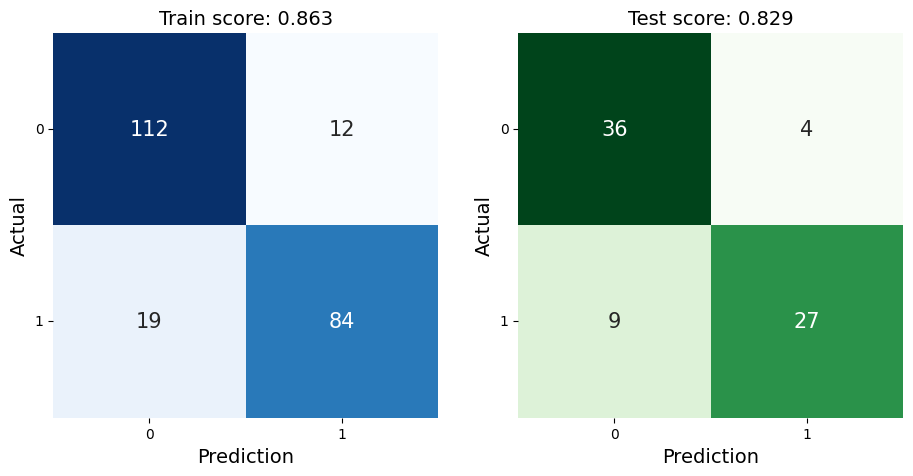

In [47]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, GNB) # gambar grafik mengguakan plot_confusion_matrix